In [75]:
# Import statements
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import sys 
import matplotlib.pyplot as plt
import pandas_profiling

In [76]:
sys.path.append('..')
from scripts import project_functions as pf
df = pf.load_and_process("C:/Users/serav/Documents/UBC/SUMMER 2021/TERM 2/DATA 301/project-group-30/data/raw/police_killings.csv")
df.head()

,age,gender,raceethnicity,month,state,cause,armed,pop,share_white,income,urate,age_group,pop_group,income_bracket,urate_level,SW_category
0,16,Male,Black,February,AL,Gunshot,No,3779,60.5,28375,0.097686,10 - 19,3000 - 4000,28000 - 29000,0.09 - 0.11,Half
1,27,Male,White,April,LA,Gunshot,No,2769,53.8,14678,0.065724,20 - 29,2000 - 3000,14000 - 15000,0.06 - 0.08,Half
2,26,Male,White,March,WI,Gunshot,No,4079,73.8,25286,0.166293,20 - 29,4000 - 5000,25000 - 26000,0.15 - 0.51,High
3,25,Male,Hispanic/Latino,March,CA,Gunshot,Firearm,4343,1.2,17194,0.124827,20 - 29,4000 - 5000,17000 - 18000,0.12 - 0.15,Low
4,29,Male,White,March,OH,Gunshot,No,6809,92.5,33954,0.063550,20 - 29,6000 - 7000,33000 - 34000,0.0 - 0.05,Very High


In [ ]:
# My dataset have 449 rows and 16 columns
df.shape

In [7]:
# This shows the rande of my numerical columns
print(f"max of Age = {max(df['age'])} and min of Age= {min(df['age'])}")
print(f"max of Pop = {max(df['pop'])} and min of Pop= {min(df['pop'])}")
print(f"max of Share_white = {max(df['share_white'])} and min of Share_white = {min(df['share_white'])}")
print(f"max of Income = {max(df['income'])} and min of Income= {min(df['income'])}")
print(f"max of Urate = {max(df['urate'])} and min of Urate= {min(df['urate'])}")

max of Age = 87 and min of Age= 16
max of Pop = 13987 and min of Pop= 403
max of Share_white = 99.6 and min of Share_white = 0.0
max of Income = 86023 and min of Income= 5457
max of Urate = 0.507614213 and min of Urate= 0.011335013


In [ ]:
"""
This alows me to get a better understanding of my discrete variables. 
This will inform me the complete variables in each column when making visualizations.
"""
print(f"raceethnicity = {df.raceethnicity.unique()}")
print(f"month = {df.month.unique()}")
print(f"state = {df.state.unique()}")
print(f"cause = {df.cause.unique()}")
print(f"armed = {df.armed.unique()}")
print(f"age_group = {df.age_group.unique()}")
print(f"pop_group = {df.pop_group.unique()}")
print(f"income_bracket = {df.income_bracket.unique()}")
print(f"urate_level = {df.urate_level.unique()}")
print(f"SW_category = {df.SW_category.unique()}")

In [6]:
# This shows that there is nothing weird with the data and my method chains worked 
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,age,pop,share_white,income,urate
count,449.000000,449.000000,449.000000,449.000000,449.000000
mean,37.507795,4714.706013,51.428953,24180.189310,0.118602
std,13.030375,2021.740188,29.886998,8977.243718,0.069179
min,16.000000,403.000000,0.000000,5457.000000,0.011335
25%,28.000000,3357.000000,26.100000,18174.000000,0.069404
50%,36.000000,4465.000000,55.000000,22177.000000,0.106713
75%,45.000000,5787.000000,76.900000,28490.000000,0.144498
max,87.000000,13987.000000,99.600000,86023.000000,0.507614


<AxesSubplot:>

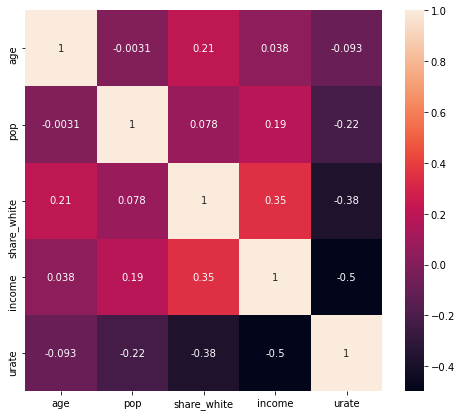

In [11]:
# Plotting heatmap
"""
Interesting observations:
1.Age and Income only have weak positive correlation
    -I predicted that it would have a stronger positive correlation as one would expect that older poeple are more financially stable.
    -This relationship can be moderated by state 
2.Pop and Share_white have a weak positive correlation
    -I expected that there would be a stronger positive correlation between pop and share_white as I thought there's a higher chance that there will be a greater share of caucasians.
3.Pop and urate have have medium negative correlation
    -This is quite expected as a greater population might indicate that it is more urbanized and there is greater talented workforce
    -As this is a negative correlation, it coincides with US being a developed country as it has enough jobs for their large population that increasing population does not increase the unemployment rate.
4.Share_white and income have a medium positive correlation
    -Racism and discrimination can contribute to this correlation as people of color find it harder to live in areas that have good job opportunities
5.Share_white and urate have a medium negative correlation
    -Racism and discrimination can contribute to this correlation as people of color find it harder to live in areas that have good job opportunities
6.Observation 4 and 5 validate each other as lower unemployment rate means that more people have a job, which can indicate that job opportunities are good in terms of availability and pay in the area. So the greater the share of the population that is caucasian, the higher the personal income and the lower the unemployment rate.
7.Urate and income have a strong negative correlation
    -This is correct and expected as less unemployment rate, again, indicates the availability of good job opportunities in terms of availability and pay.
"""
plt.figure(figsize=(8,7))
corr = df.corr()
sns.heatmap(corr, annot = True)

# Distribution Plot
## Observations:
-Age between 20-47 has the most cases

-Urate between 0.05-0.15 has the most cases

-Population between 3000-5000 has the most cases

-Both sides of the extremes in Share_white seems to have more cases than when the share of the population that is Caucasian and people of color is roughly equal.

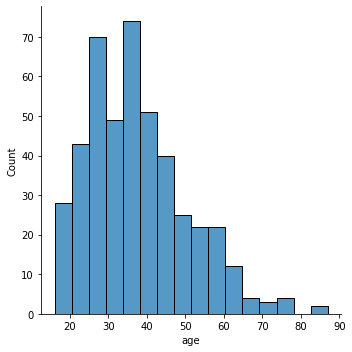

In [47]:
sns.displot(df['age'])

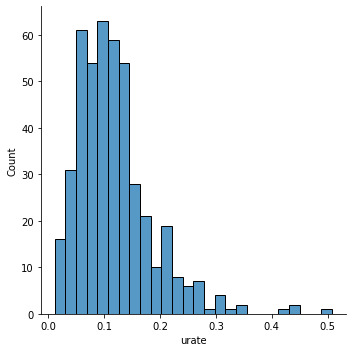

In [70]:
sns.displot(df['urate'])

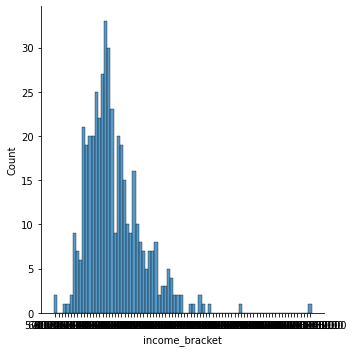

In [30]:
sns.displot(df['income_bracket'])

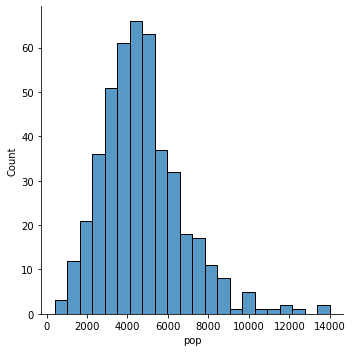

In [53]:
sns.displot(df['pop'])

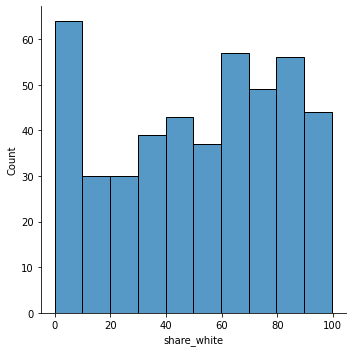

In [89]:
sns.displot(df['share_white'])

# Countplot
## Observation:
-Male has more cases

-For Race ethnicity we need to be careful because it is not population controled. The graph shows that Causcasian has the most cases and folowed by African American

-There does not seem to be a significance difference in the number of cases in January to May. However, the number of cases in June is very low.

-California has the highest amount of cases. However, we need to be careful as the data is not population controlled

-The most likely cause of death is by a gunshot

-Most cases involved the victim having a firearm. However, it is important to note that victims who was not armed make up roughly half the cases of those victims armed with firearm.

<Figure size 2160x2160 with 0 Axes>

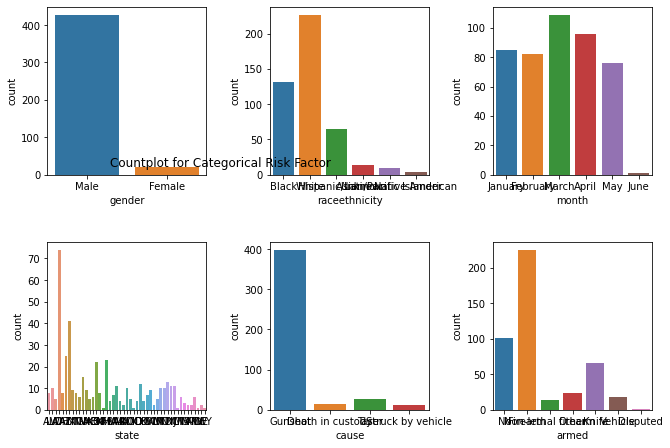

In [27]:
plt.figure(figsize=(30,30))
fig, ax = plt.subplots(2, 3)
fig.suptitle('Countplot for Categorical Risk Factor', va='top')
sns.countplot(x='gender', data = df, ax = ax[0,0])
sns.countplot(x='raceethnicity', data = df, ax = ax[0,1])
order = ('January', 'February', 'March', 'April', 'May', 'June')
sns.countplot(x='month', data = df, order = order, ax = ax[0,2])
sns.countplot(x='state', data = df, ax = ax[1,0])
sns.countplot(x='cause', data = df, ax = ax[1,1])
sns.countplot(x='armed', data = df, ax = ax[1,2])
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.5, 
                    top=1.5, 
                    wspace=0.4, 
                    hspace=0.4)

In [ ]:
sns.countplot(x='gender', data = df)

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(x='raceethnicity', data = df)

In [ ]:
order = ('January', 'February', 'March', 'April', 'May', 'June')
sns.countplot(x='month', data = df, order = order)

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(x='state', data = df)

In [ ]:
sns.countplot(x='cause', data = df)

In [ ]:
sns.countplot(x='armed', data = df)

In [ ]:
sns.pairplot(df)

In [48]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Research Questions
Are the following variables a risk factor for the occurance of a pollice killing accident?
    
    1.Age 
    
    2.Gender
    
    3.Raceethnicity 
    
    4.Victim armed 
    
    5.Population size
    
    6.Income 
    
    7.Share_white
    
    8.Month

<AxesSubplot:title={'center':'KDE Plot for Age'}, xlabel='age', ylabel='Density'>

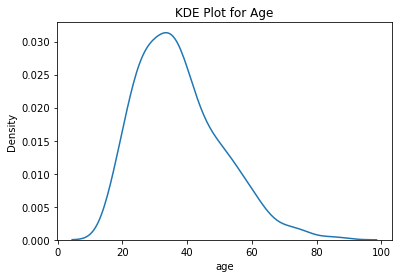

In [50]:
"""
The KDE graph shows that age is a risk factor as certain ages, particularly ages 20-40, have a higher probability of being killed by the police.
This observation corresponds to the EDA I did on age where the distplot shows the highest count of cases for ages 20-47.
**LOOK AT THE CORRELATION WITH INCOME
The observation that being in middle age and having a lower income are risk factors, provide support for the weak positive correlation between Age and Income I found during EDA. 
The risk factors support the correlation becasue the age range is pretty big and the risk is highest for those with low income, so it shows that being older is not more likely to have higher income. 
"""
plt.title('KDE Plot for Age')
sns.kdeplot(df['age'])

<AxesSubplot:title={'center':'KDE Plot for Income'}, xlabel='income', ylabel='Density'>

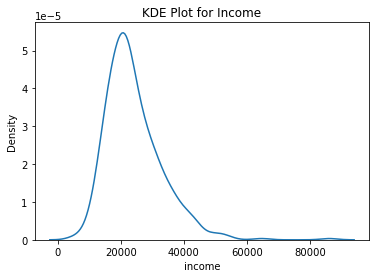

In [51]:
"""
Income seems to be a risk factor as there is a sharp peak in probability for income between $15000 - $25000, which is the lower-income bracket.
Possible reasons:
    -People with lower income are more likely to be involved in crimes
    -The police feel they have more power
"""
plt.title('KDE Plot for Income')
sns.kdeplot(df['income'])

<AxesSubplot:title={'center':'KDE Plot for Population Size'}, xlabel='pop', ylabel='Density'>

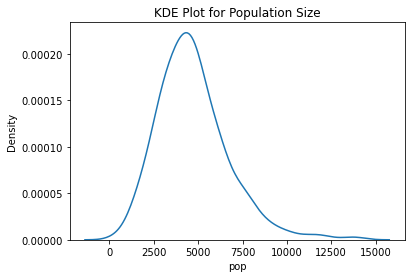

In [56]:
"""
The KDE plot shows that population size is a risk factor. An area with 2500 - 5500 population seem to have a higher probability.
This observation coincides with the EDA analysis.
Possible reasons for this observation:
    -Greater because there are more people and crimes
    -
"""
plt.title('KDE Plot for Population Size')
sns.kdeplot(df['pop'])

<AxesSubplot:title={'center':'KDE Plot for Share_white'}, xlabel='share_white', ylabel='Density'>

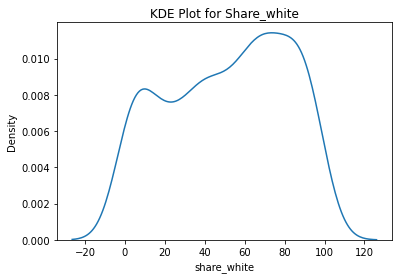

In [63]:
"""
There doesn't seem to be a large distinction in the graph for share_white.
However, there seems to be an upward trend where the higher the share of the population that is white, the higher the probability of a police killing accident to occur.
This observation does not fully coincide with the EDA but shows the same trend. 
"""
plt.title('KDE Plot for Share_white')
sns.kdeplot(df['share_white'])

TypeError: Horizontal orientation requires numeric `x` variable.

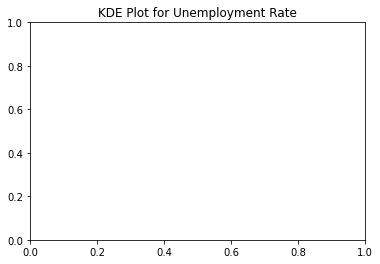

In [73]:
plt.title('KDE Plot for Unemployment Rate')
sns.boxplot(x='gender', data=df)

<AxesSubplot:xlabel='state', ylabel='share_white'>

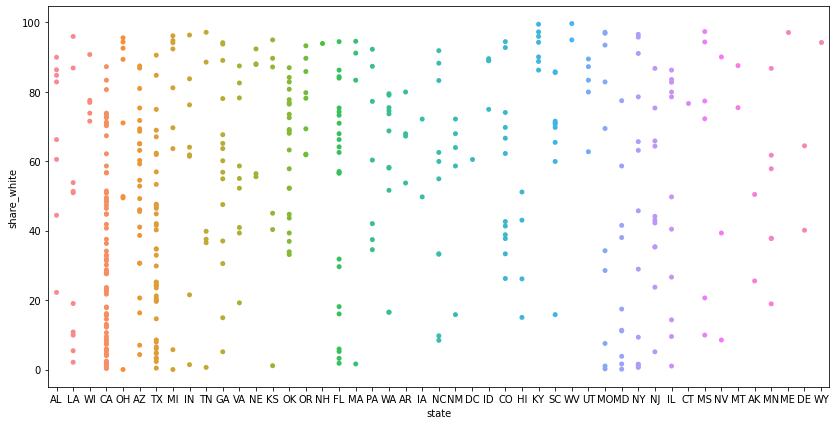

In [67]:
plt.figure(figsize=(14,7))
sns.stripplot(x='state',y='share_white',data=df, jitter=False)